# we see that loss decreases when we add in cage data. This must be because it's of a different distribution than the rest!

In [1]:
#so let's simply load in the dataset to get an example, then calculate losses!
import zarr
split = 'test'
data_path = f'/data/leslie/sarthak/data/enformer/data/{split}_label.zarr'
labels = zarr.open(data_path, mode='r')['labels']
print(labels.shape)

(1937, 896, 5313)


In [3]:
#then we will 
labels.nbytes/1e9

36.883951104

In [4]:
#now let's take the mean along the first 2 axes
import numpy as np
mean = np.mean(labels, axis=(0,1))
print(labels.shape)

(1937, 896, 5313)


In [5]:
print(mean.shape)

(5313,)


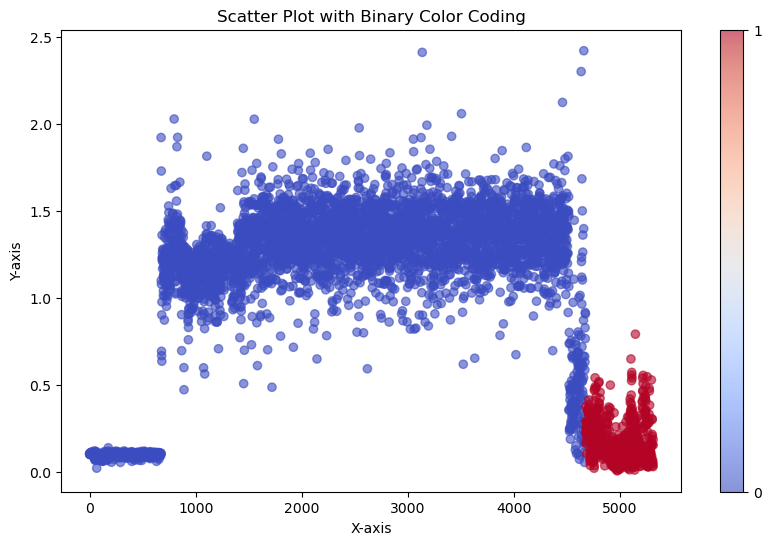

In [6]:
#now we come up with the colors
import matplotlib.pyplot as plt
c = np.zeros(mean.shape)
c[4675:] = 1

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(range(mean.shape[0]),mean, c=c, cmap='coolwarm', alpha=0.6)

# Customize the plot
plt.title('Scatter Plot with Binary Color Coding')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['0', '1'])
#in this plot, the blue are the ATAC + CHIP + DNase, and the red are the CAGE
#the first 684 is DNase, 

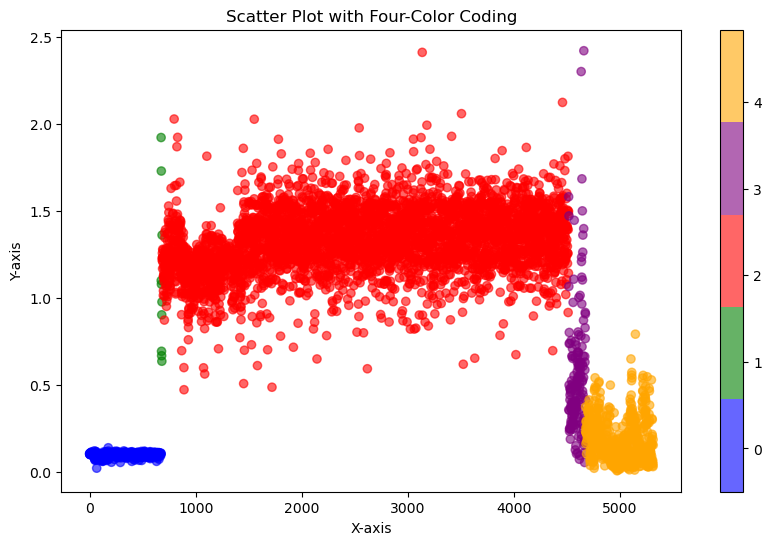

In [10]:
#now let's color based on all types
c = np.zeros(mean.shape)
c[674:684] = 1 #ATAC
c[684:4515] = 2 #CHIP
c[4515:4675] = 3 #CHIP2
c[4675:] = 4 #CAGE

colors = ['blue', 'green', 'red', 'purple', 'orange']
cmap = plt.cm.colors.ListedColormap(colors)

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(range(mean.shape[0]),mean, c=c, cmap=cmap, alpha=0.6)

# Customize the plot
plt.title('Scatter Plot with Four-Color Coding')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a color bar
cbar = plt.colorbar(scatter, ticks=[0.375, 1.125, 1.875, 2.625, 3.375])
cbar.set_ticklabels(['0', '1', '2', '3', '4'])
#very clearly that other CHIP data is different, idk what it is tho
#point is tho ATAC values are tiny, and CHIP values are high, but CAGE values are small

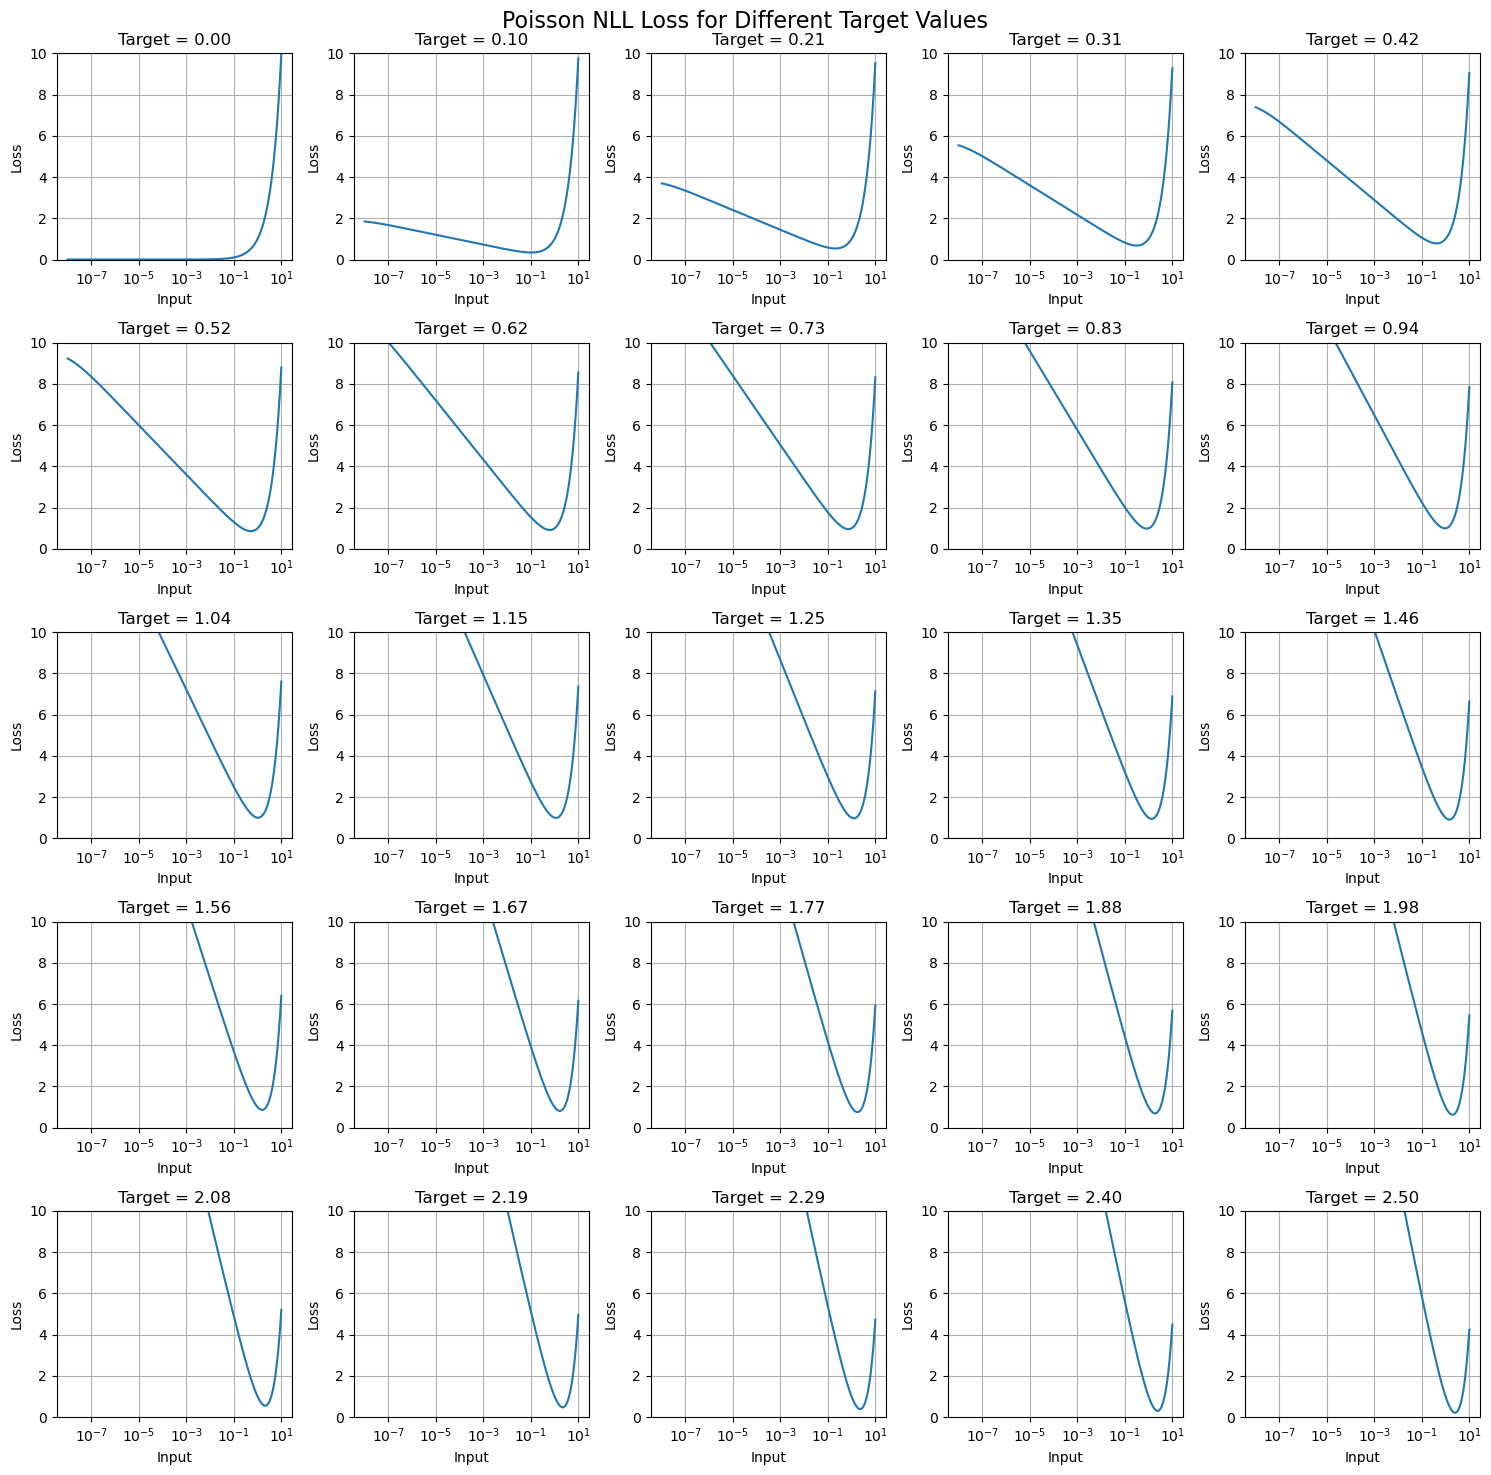

In [12]:
#and poisson loss in general when you are smaller tends to be smaller?
#let's find the function and plot it
#so log input is false, thus it uses this equation
#input−target∗log(input+eps)
def fn(input, target, eps=1e-8):
    return input - target*np.log(input+eps)

# Set up the plot
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
fig.suptitle('Poisson NLL Loss for Different Target Values', fontsize=16)

# Generate input values
inputs = np.logspace(-8, 1, 1000)  # from 1e-8 to 10

# Generate target values
targets = np.linspace(0, 2.5, 25)  # 9 targets from 0 to 2.5

for i, ax in enumerate(axs.flat):
    target = targets[i]
    losses = fn(inputs, target)
    
    ax.semilogx(inputs, losses)
    ax.set_title(f'Target = {target:.2f}')
    ax.set_xlabel('Input')
    ax.set_ylabel('Loss')
    ax.grid(True)
    
    # Set y-axis limit to focus on the relevant part of the curve
    ax.set_ylim(0, 10)

plt.tight_layout()
plt.show()

#this makes sense, as your input target value gets larger, we get a larger loss especially if we're wrong or underestimating
#this isn't perfect, but it does go to show my point, and the loss isn't that huge!

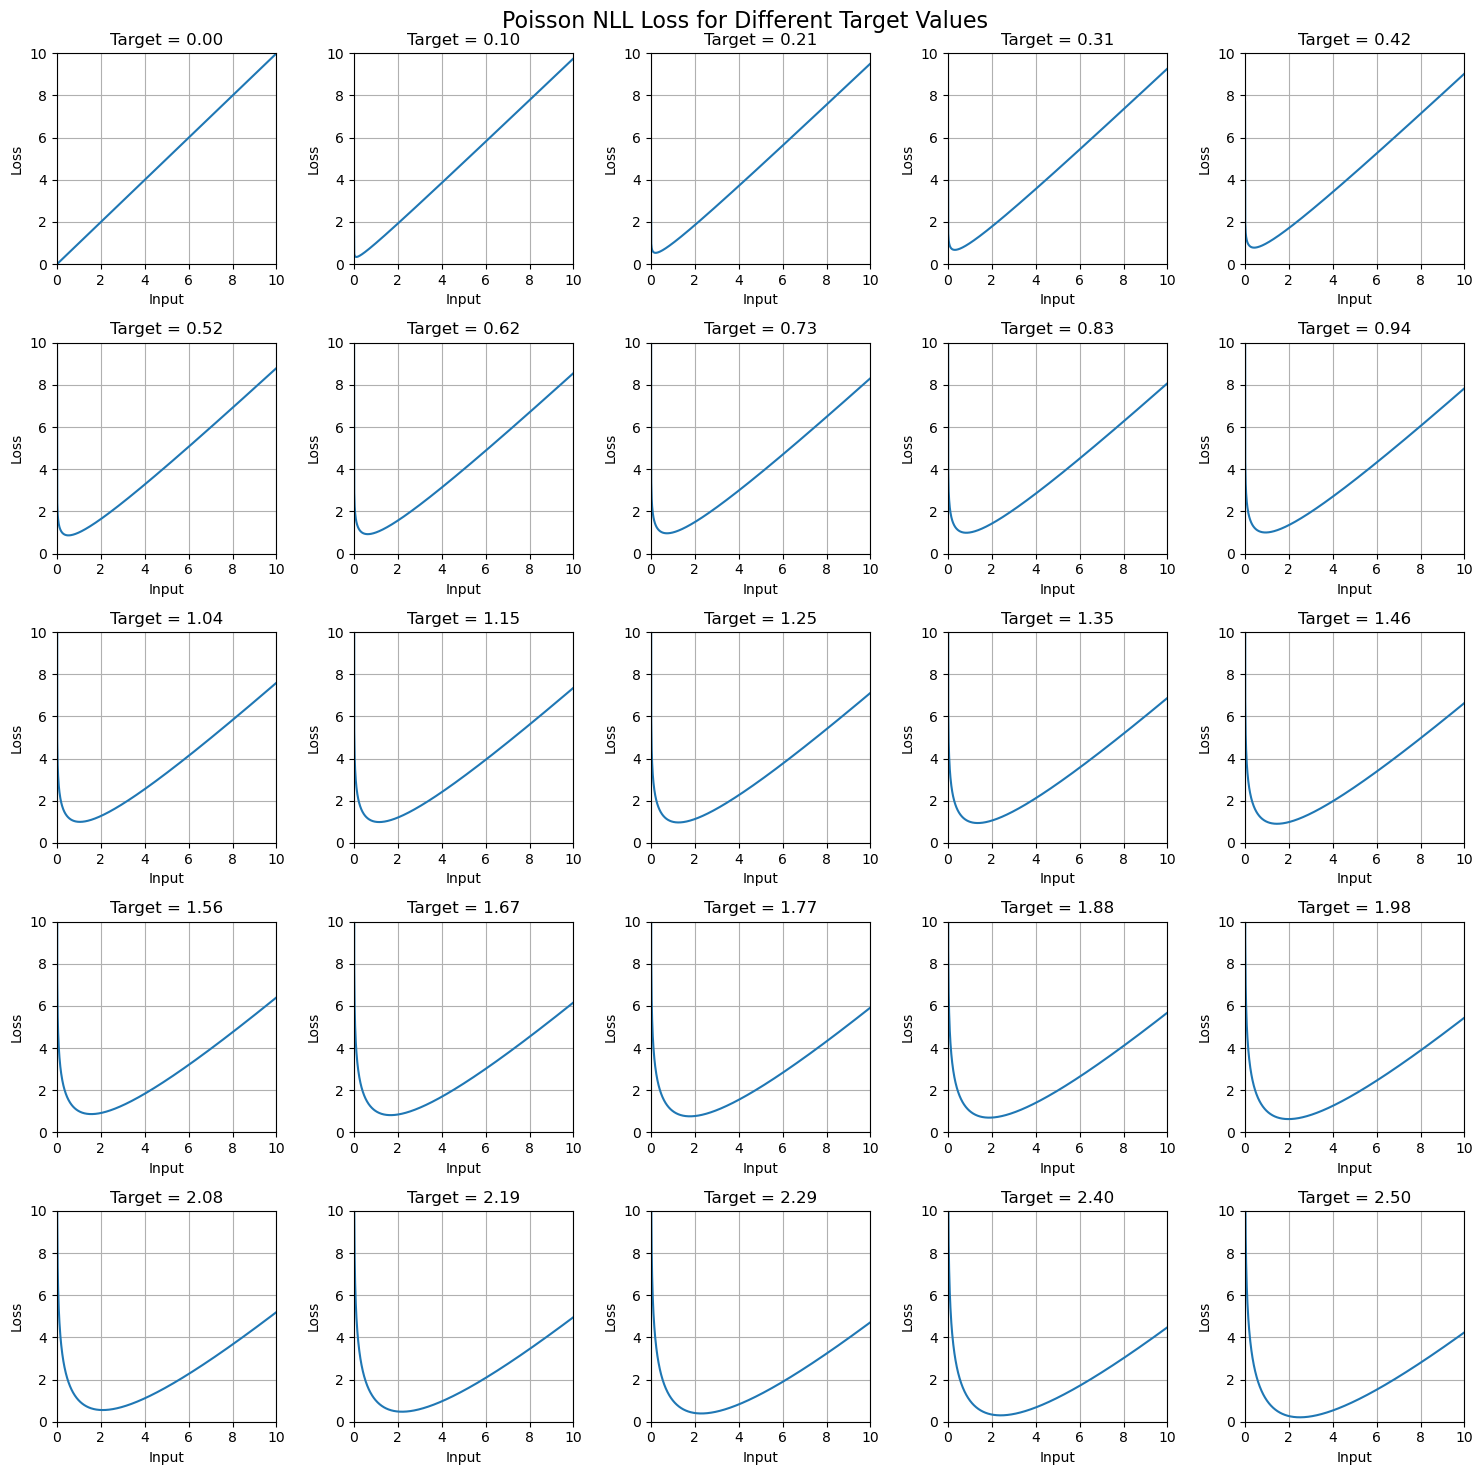

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def fn(input, target, eps=1e-8):
    return input - target * np.log(input + eps)

# Set up the plot
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
fig.suptitle('Poisson NLL Loss for Different Target Values', fontsize=16)

# Generate input values (linear scale)
inputs = np.linspace(0, 10, 1000)  # from 0 to 10

# Generate target values
targets = np.linspace(0, 2.5, 25)  # 9 targets from 0 to 2.5

for i, ax in enumerate(axs.flat):
    target = targets[i]
    losses = fn(inputs, target)
    
    ax.plot(inputs, losses)
    ax.set_title(f'Target = {target:.2f}')
    ax.set_xlabel('Input')
    ax.set_ylabel('Loss')
    ax.grid(True)
    
    # Set axis limits to focus on the relevant part of the curve
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)

plt.tight_layout()
plt.show()

In [1]:
#now remember the model tends to underestimate and pick 0 more often, we can see this by plotting a single example!
import sys
sys.path.append('/data/leslie/sarthak/caduceus/evals/')
from evals_utils_enformer import Evals, pearsonr2
import numpy as np

cage = Evals('/data/leslie/sarthak/caduceus/outputs/2024-09-10/16-15-22-499398/checkpoints/15-val_loss=0.52479.ckpt')

Using kmer genome with length 6
5313


In [3]:
out1 = cage(3)
print(out1.shape)

torch.Size([1, 896, 5313])


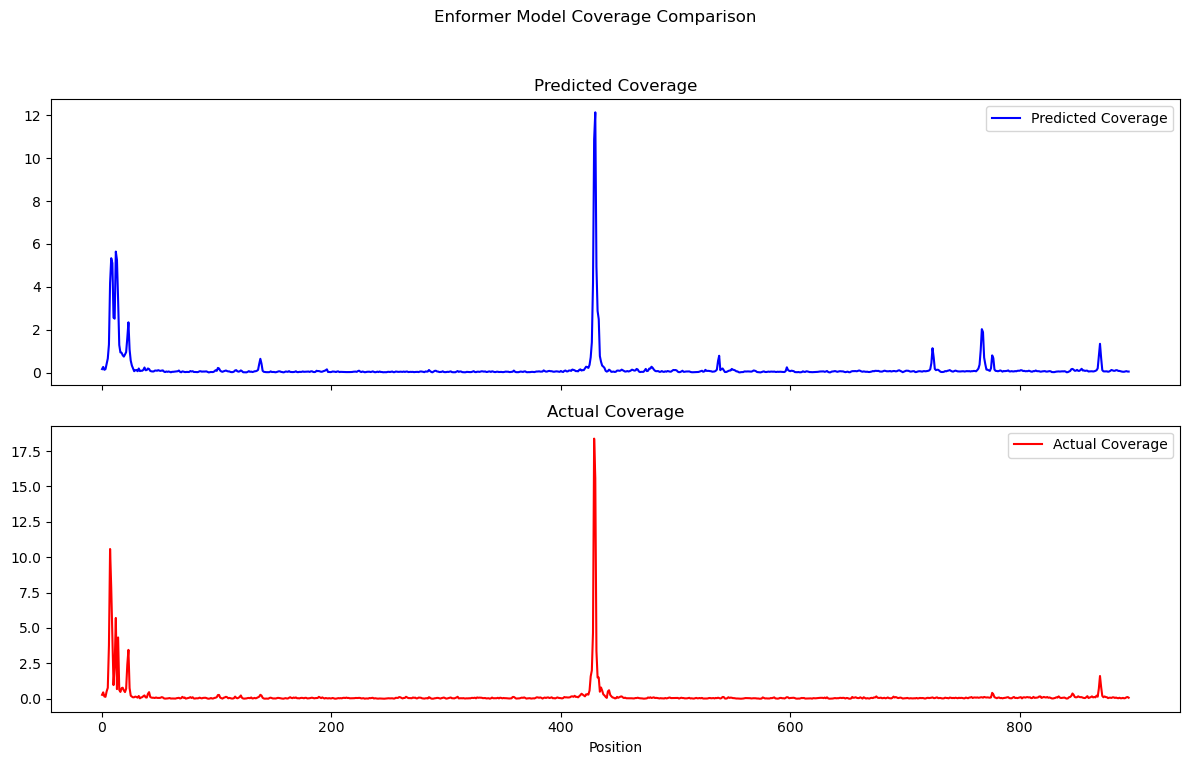

In [4]:
#now let's plot an example
cage.plot_track(3)

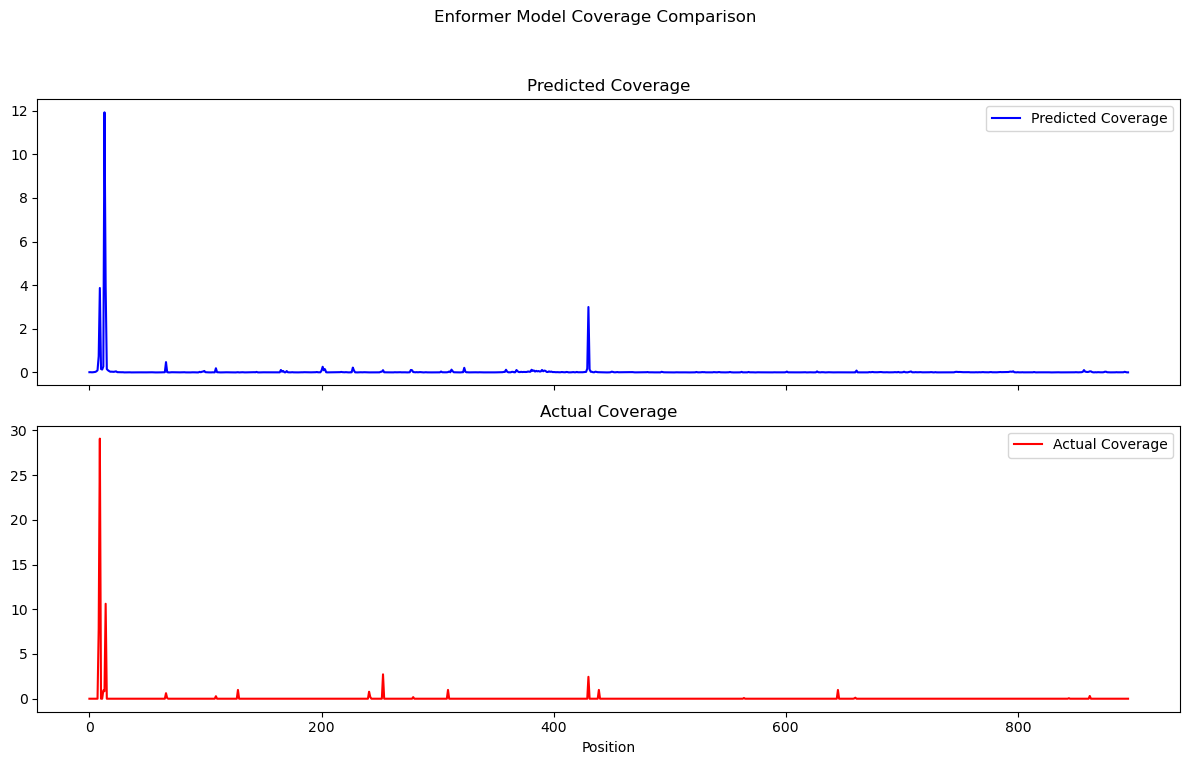

NameError: name 'plt' is not defined

In [6]:
cage.plot_track(3, track=5000)

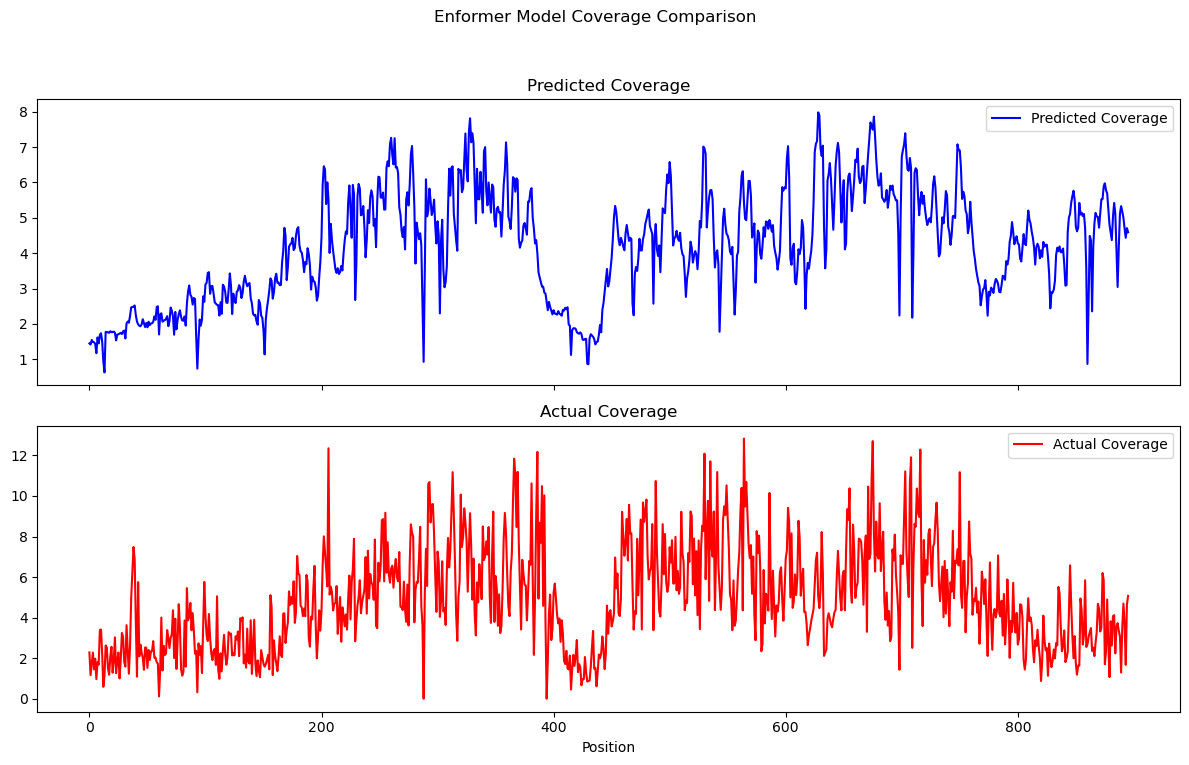

In [8]:
cage.plot_track(3, track=2999)